<a href="https://colab.research.google.com/github/DrTihami/Insurance-Premium-prediction/blob/main/Insurance_Cost_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
!pip install scikit-learn==1.5.1
# My Pycharm was having 1.5.1 Version of scikit-learn installed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
! gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 39.6MB/s]


In [ ]:
df1 = pd.read_csv("/content/insurance.csv")

In [ ]:
df1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
df=df1.copy()

In [ ]:
df.shape

(986, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.isnull().sum()/len(df)*100

,0
Age,0.0
Diabetes,0.0
BloodPressureProblems,0.0
AnyTransplants,0.0
AnyChronicDiseases,0.0
Height,0.0
Weight,0.0
KnownAllergies,0.0
HistoryOfCancerInFamily,0.0
NumberOfMajorSurgeries,0.0


In [ ]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
# Mean Age, Height, Weight & Premium is 41.75 Years, 168 cms, 76.95 Kgs and 24337 rupees respectively.
# Median Age, Height, Weight & Premium is 42 Years, 168 cms, 75 Kgs and 23000 rupees respectively.
# The Minimum Age, Height, Weight & Premium is 18 Years, 145 cms, 51 Kgs & 15000 rupees respectively.
# The Maximum Age, Height, Weight & Premium is 66 Years, 188 cms, 132 Kgs & 40000 rupees respectively.

In [ ]:
# Unique Values of all the Features
columns = df.columns
for column in columns:
    print(f'The number of unique values in {column} is:', df[column].nunique())
    print(f'The unique values in {column} are:', df[column].unique())
    print('*' * 30)

The number of unique values in Age is: 49
The unique values in Age are: [45 60 36 52 38 30 33 23 48 66 24 46 18 42 57 21 49 20 35 53 31 22 26 28
 64 50 44 58 43 25 54 63 61 41 55 19 40 32 27 34 59 29 47 39 37 51 56 62
 65]
******************************
The number of unique values in Diabetes is: 2
The unique values in Diabetes are: [0 1]
******************************
The number of unique values in BloodPressureProblems is: 2
The unique values in BloodPressureProblems are: [0 1]
******************************
The number of unique values in AnyTransplants is: 2
The unique values in AnyTransplants are: [0 1]
******************************
The number of unique values in AnyChronicDiseases is: 2
The unique values in AnyChronicDiseases are: [0 1]
******************************
The number of unique values in Height is: 44
The unique values in Height are: [155 180 158 183 166 160 150 181 169 182 175 186 178 184 149 154 156 163
 151 172 162 153 168 152 161 157 147 173 179 165 174 185 177 164 

In [ ]:
# Value Counts of all the Features
columns = df.columns
for column in columns:
    print(f'The number of value counts in {column} is:', df[column].value_counts())
    print('*' * 30)

The number of value counts in Age is: Age
43    30
27    27
42    27
35    26
45    25
59    25
44    24
25    24
48    24
66    23
46    23
18    23
33    23
49    23
32    22
29    22
47    22
64    22
24    22
30    22
19    21
62    21
21    21
31    20
51    20
50    20
54    20
63    19
36    19
52    19
40    19
22    19
37    18
34    18
41    18
38    17
20    17
55    17
53    17
60    17
28    17
65    17
61    16
58    16
56    15
23    13
26    13
57    12
39    11
Name: count, dtype: int64
******************************
The number of value counts in Diabetes is: Diabetes
0    572
1    414
Name: count, dtype: int64
******************************
The number of value counts in BloodPressureProblems is: BloodPressureProblems
0    524
1    462
Name: count, dtype: int64
******************************
The number of value counts in AnyTransplants is: AnyTransplants
0    931
1     55
Name: count, dtype: int64
******************************
The number of value counts in AnyChronicD

In [ ]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

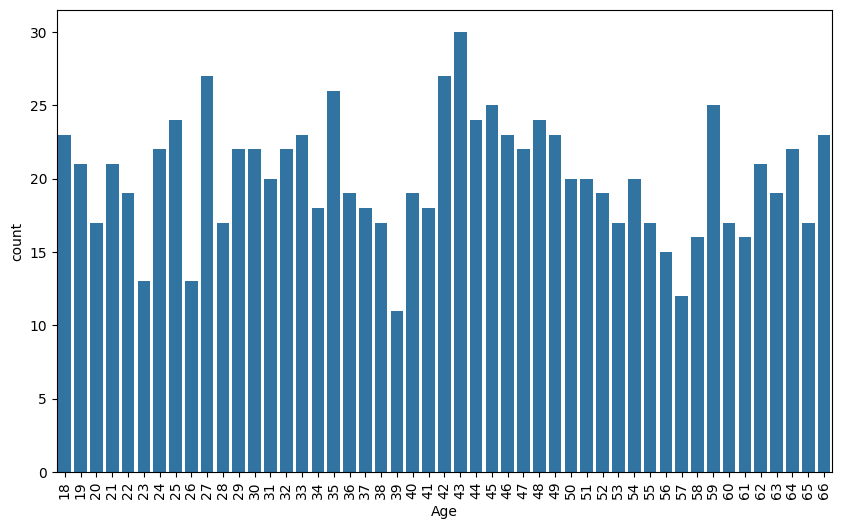

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df)
plt.xticks(rotation=90)
plt.show()

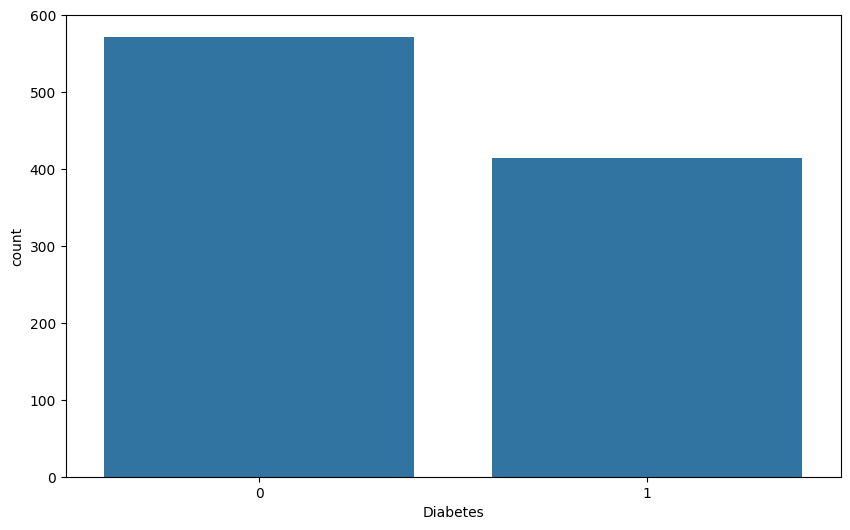

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes', data=df)
plt.show()

In [ ]:
# The count of Insurers having No Diabetes is 572 and 414 with No diabetes.

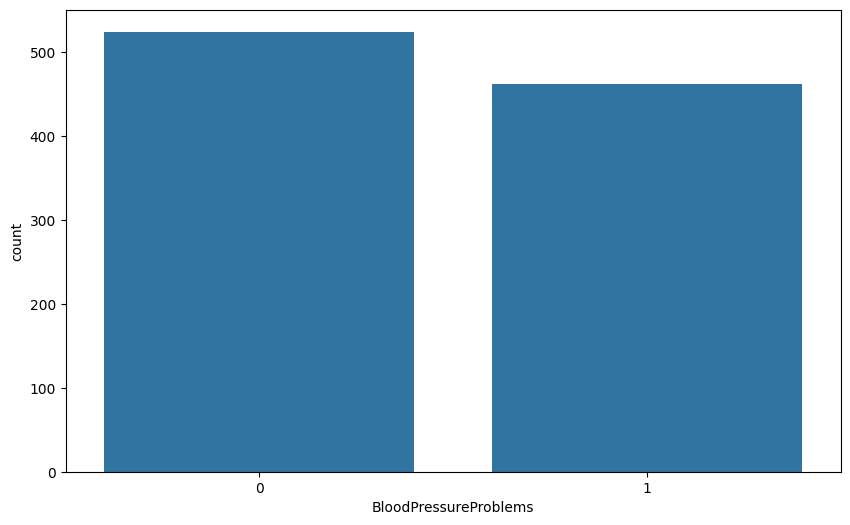

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BloodPressureProblems', data=df)
plt.show()

In [ ]:
# There are 524 people with no Blood Pressure and 462 with Blood Pressure.

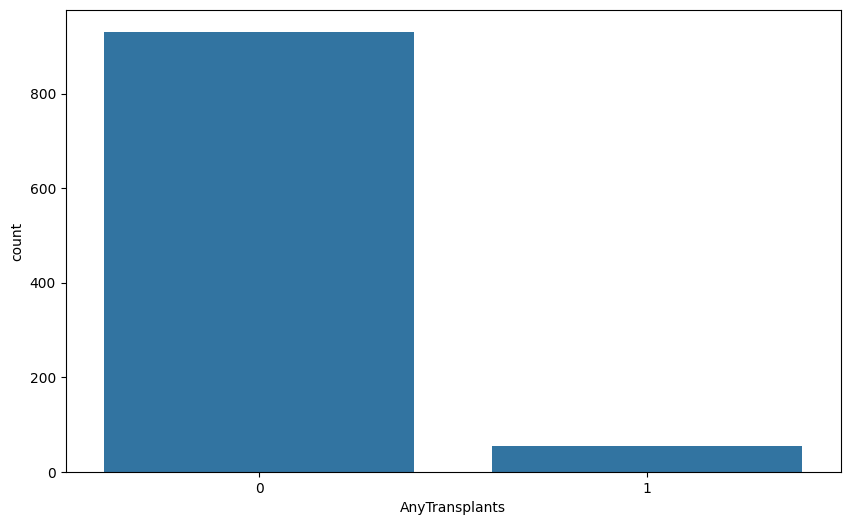

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AnyTransplants', data=df)
plt.show()

In [ ]:
#  931 Insurers have not done any kind of transplant while as 55 people have done transplant.
# Majority of people are not having any kind of Transplants done.

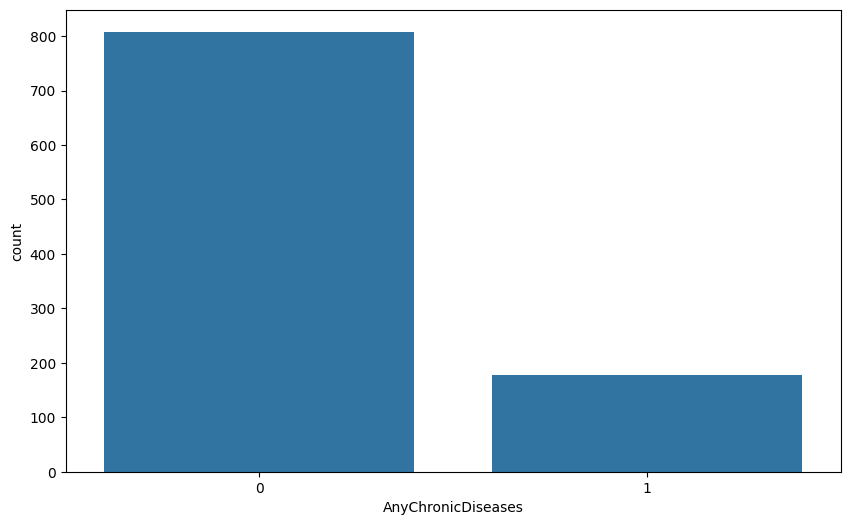

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AnyChronicDiseases', data=df)
plt.show()

In [ ]:
# There are 808 people without having any Chronic Disease while 178 are with Chronic Diseases.
# More people are without having any chronic diseases.

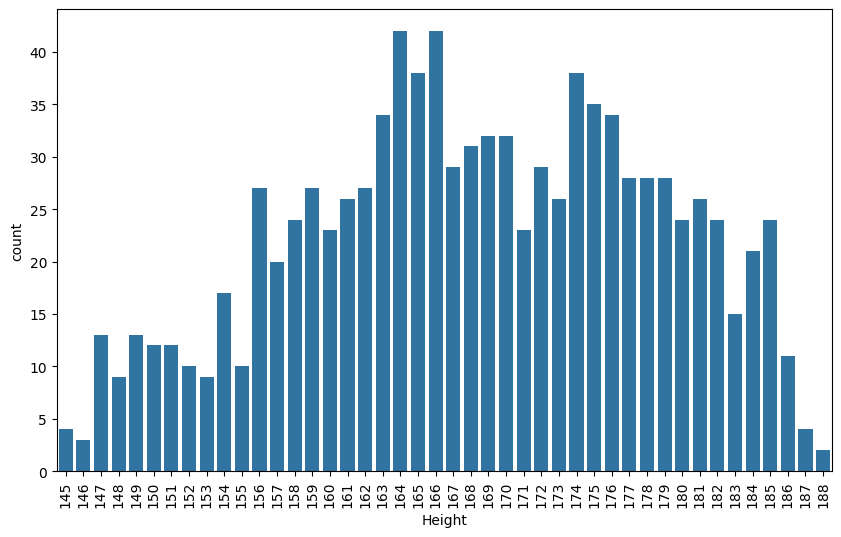

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Height', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Height varies from 145 to 188 cms

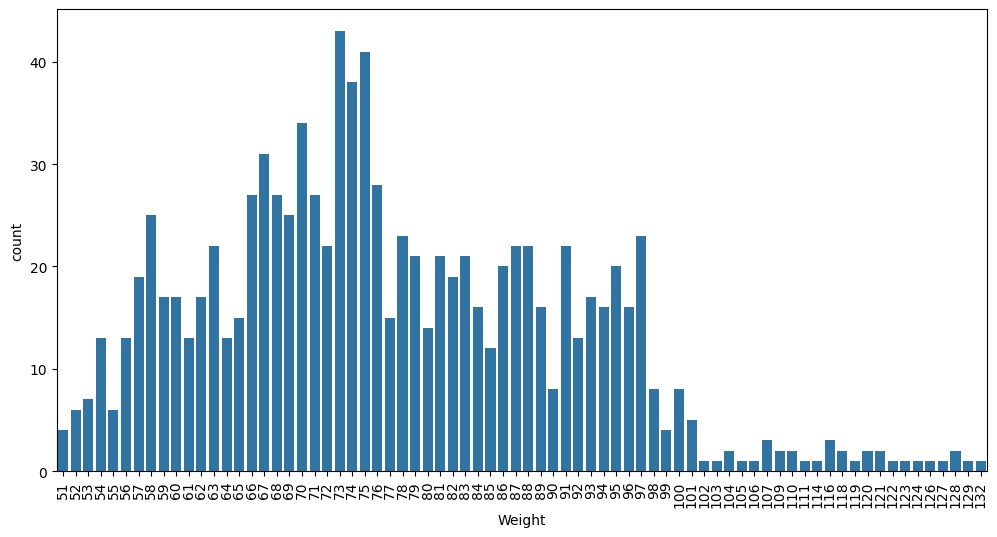

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Weight', data=df)
plt.xlabel('Weight')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Weight varies from 51 t0 132 Kgs.

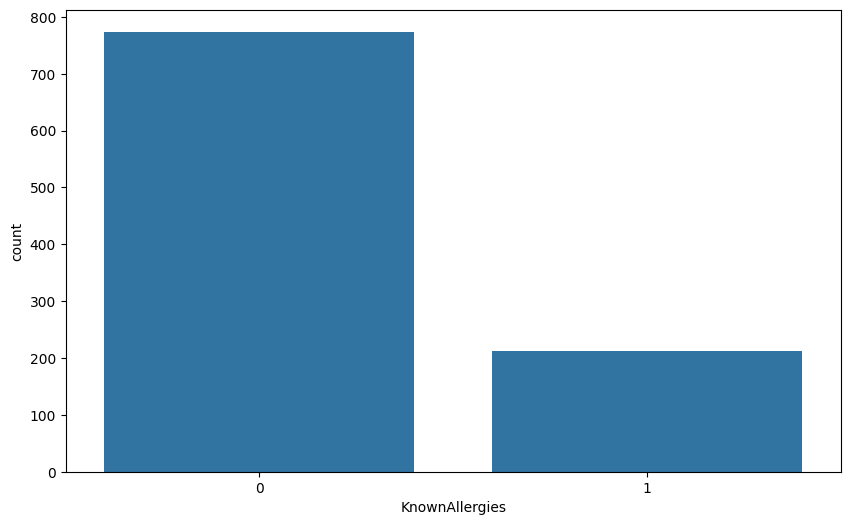

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='KnownAllergies', data=df)
plt.show()

In [ ]:
# There are 774 Insurers having No KnownAllergies and 212 having KnownAllergies.

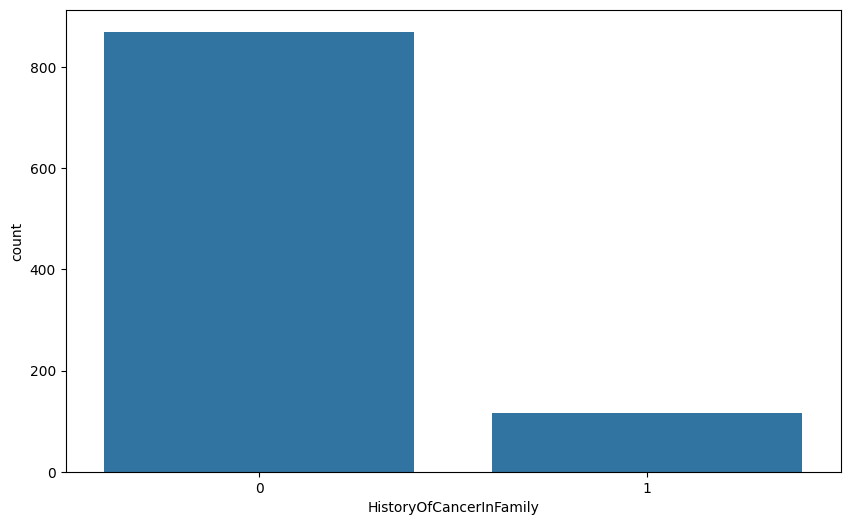

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HistoryOfCancerInFamily', data=df)
plt.show()

In [ ]:
# There are 870 people having no History of Cancer in Family and 116 with having Cancer History.
# Cancer history in family is less compared to no cancer history.

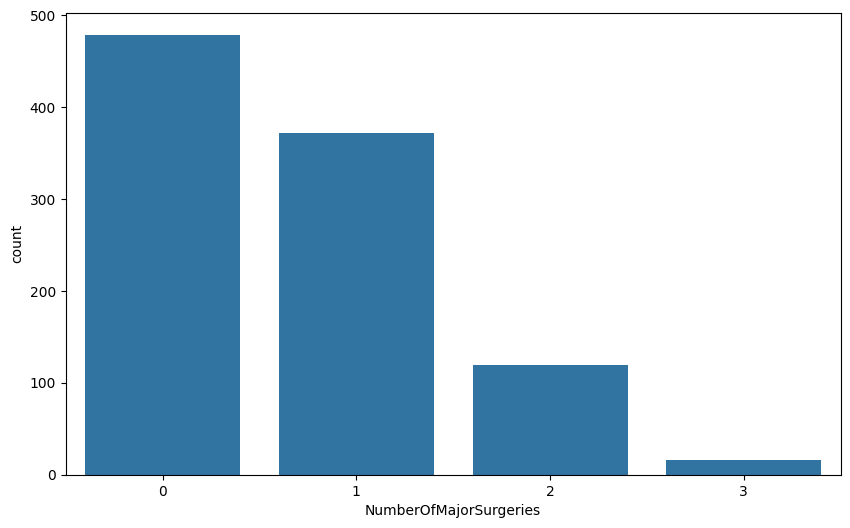

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumberOfMajorSurgeries', data=df)
plt.show()

In [ ]:
# Major number of People Insured are with No Surgerical History followed by people with one surgical intervention.
# (479, 372, 119, 16) respectively.

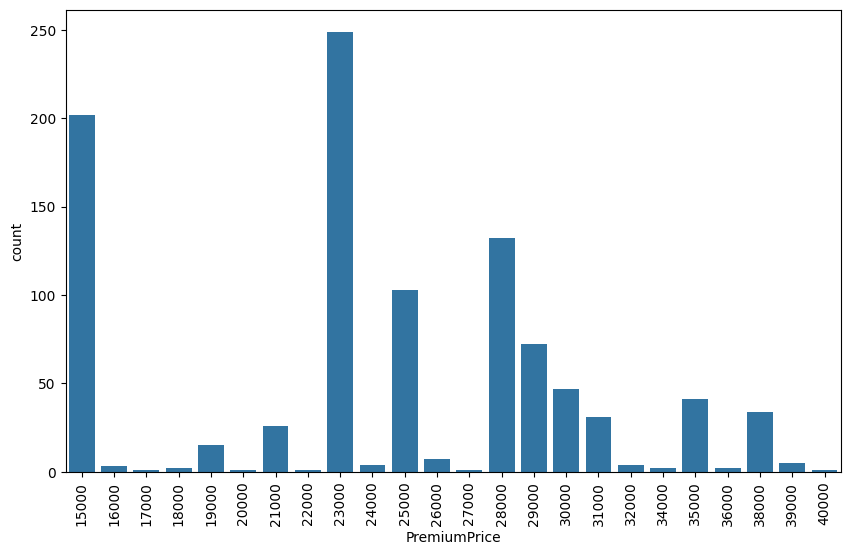

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PremiumPrice', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 23000 is the most common premium followed by 15000 and 28000.

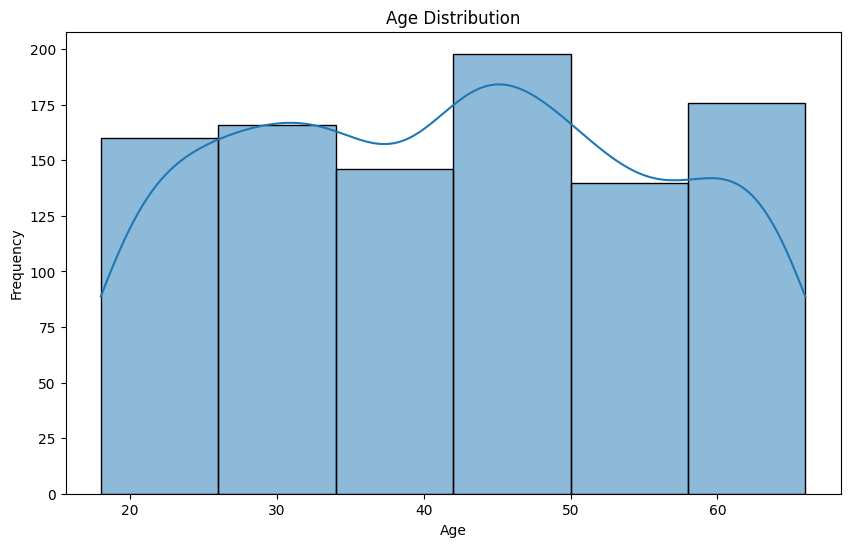

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=6, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


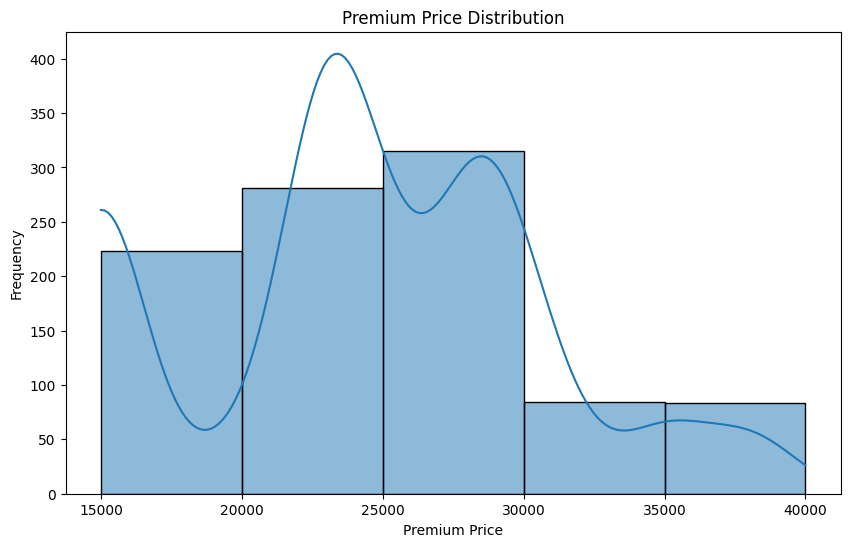

In [ ]:
# Premium Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['PremiumPrice'], bins=5, kde=True)
plt.title('Premium Price Distribution')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')
plt.show()


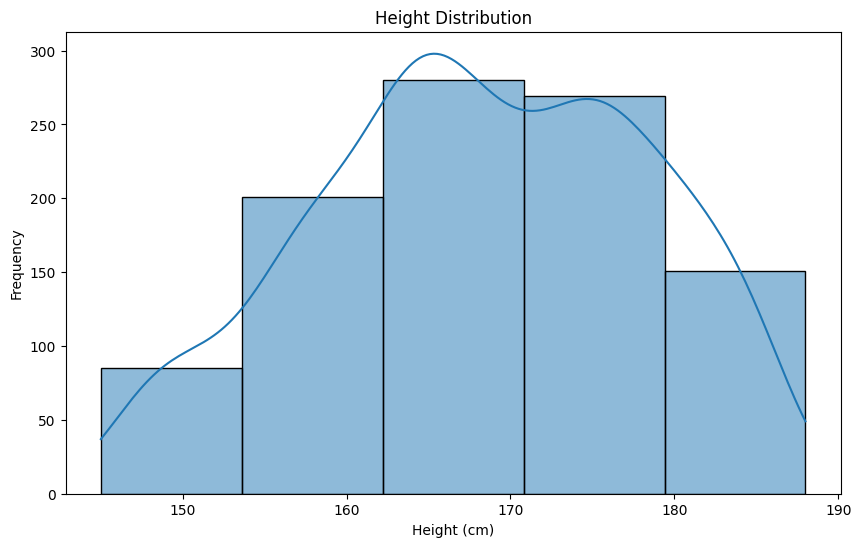

In [ ]:
# Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], bins=5, kde=True)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()



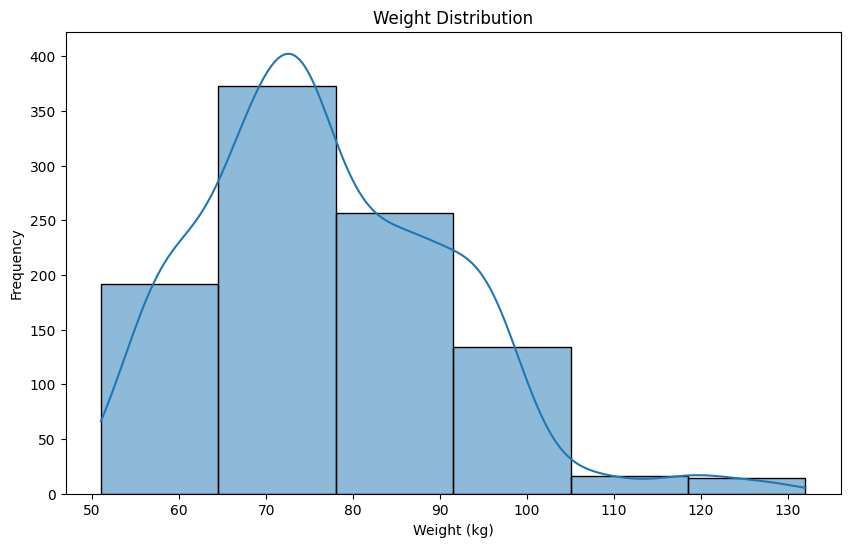

In [ ]:
# Weight Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], bins=6, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Weight Distribution is right skewed

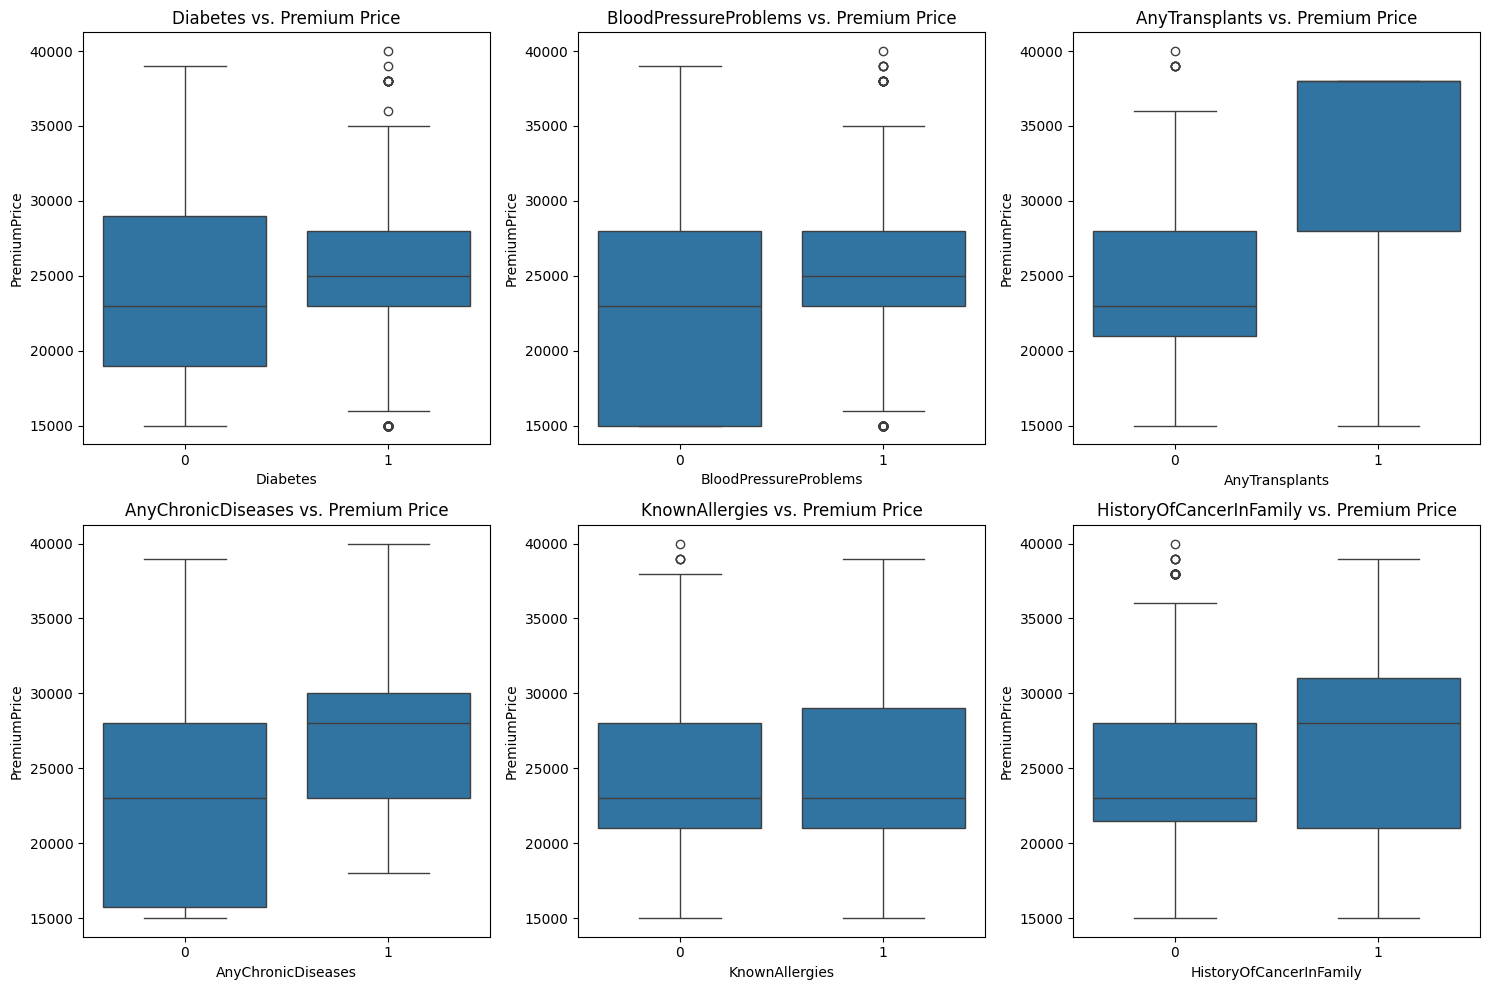

In [ ]:
# Box plots for categorical variables vs. Premium Price
categorical_vars = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
                    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=var, y='PremiumPrice', data=df)
    plt.title(f'{var} vs. Premium Price')
plt.tight_layout()
plt.show()

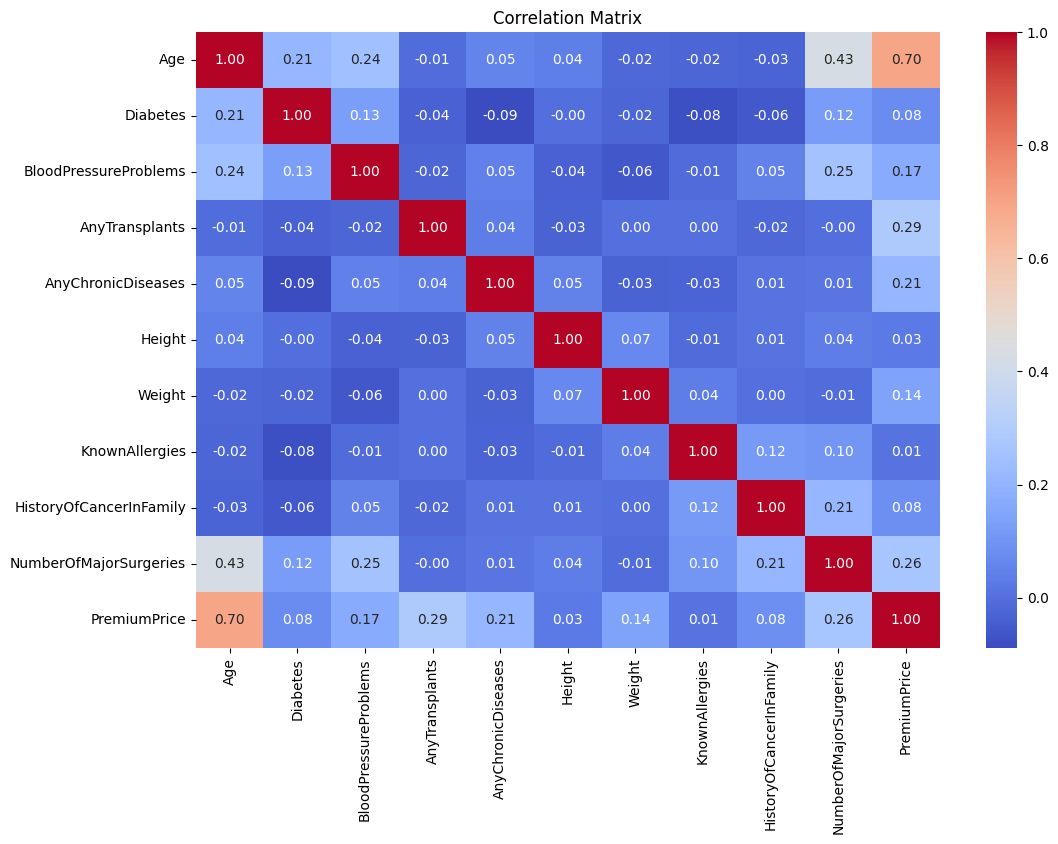

In [ ]:
# Correlation Analysis
# Generate correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Outlier Detection
# IQR Method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# detecting outliers in PremiumPrice
outliers_premium = detect_outliers_iqr(df, 'PremiumPrice')
outliers_premium


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
204,27,0,1,0,0,159,120,1,1,1,39000
295,64,1,1,0,1,163,91,0,0,2,40000
926,24,0,1,0,0,159,67,0,0,0,39000
928,19,0,0,0,0,171,67,0,0,1,39000
976,21,0,1,0,0,155,74,0,0,0,39000
984,47,1,1,0,0,158,73,1,0,1,39000


In [ ]:
# BMI Feature Creation
df['BMI'] = round(df['Weight'] / ((df['Height']/100)*(df['Height']/100)),2)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.73
1,60,1,0,0,0,180,73,0,0,0,29000,22.53
2,36,1,1,0,0,158,59,0,0,1,23000,23.63
3,52,1,1,0,1,183,93,0,0,2,28000,27.77
4,38,0,0,0,1,166,88,0,0,1,23000,31.93


In [ ]:
# The classification according to the body mass index is
# BMI less than 18.5 is underweight,
# BMI Between 18.5 and 24.9 kg/m2 is considered normal
# BMI more than 25 to 29.9 is overweight,
# and BMI more than 30 is obese

In [ ]:
# Function to classify BMI
def classify_bmi(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif BMI >= 18.5 and BMI < 25:
        return 'Normal'
    elif BMI >= 25 and BMI < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new column 'BMI Category'
df['BMICategory'] = df['BMI'].apply(classify_bmi)

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMICategory
0,45,0,0,0,0,155,57,0,0,0,25000,23.73,Normal
1,60,1,0,0,0,180,73,0,0,0,29000,22.53,Normal
2,36,1,1,0,0,158,59,0,0,1,23000,23.63,Normal
3,52,1,1,0,1,183,93,0,0,2,28000,27.77,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,31.93,Obese


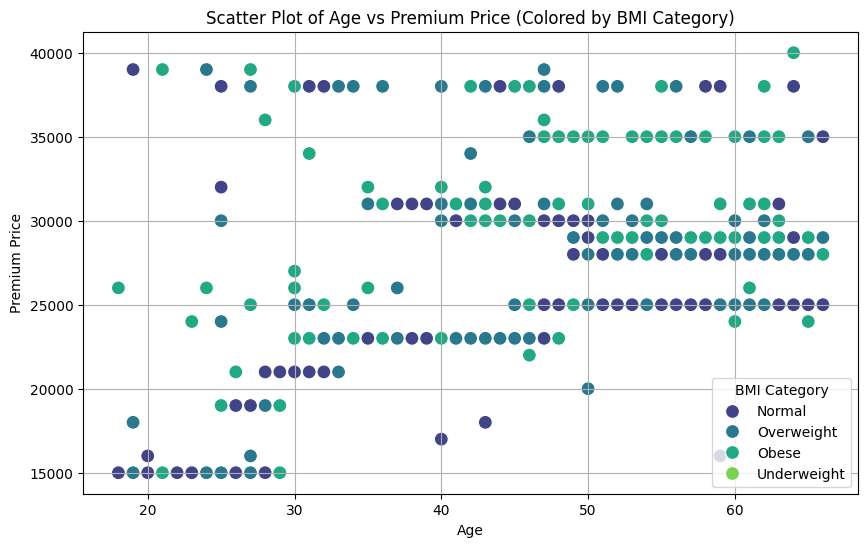

In [ ]:
# Scatter plot of Age vs Premium Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PremiumPrice', data=df, hue='BMICategory', palette='viridis', s=100)
plt.title('Scatter Plot of Age vs Premium Price (Colored by BMI Category)')
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.legend(title='BMI Category')
plt.grid(True)
plt.show()

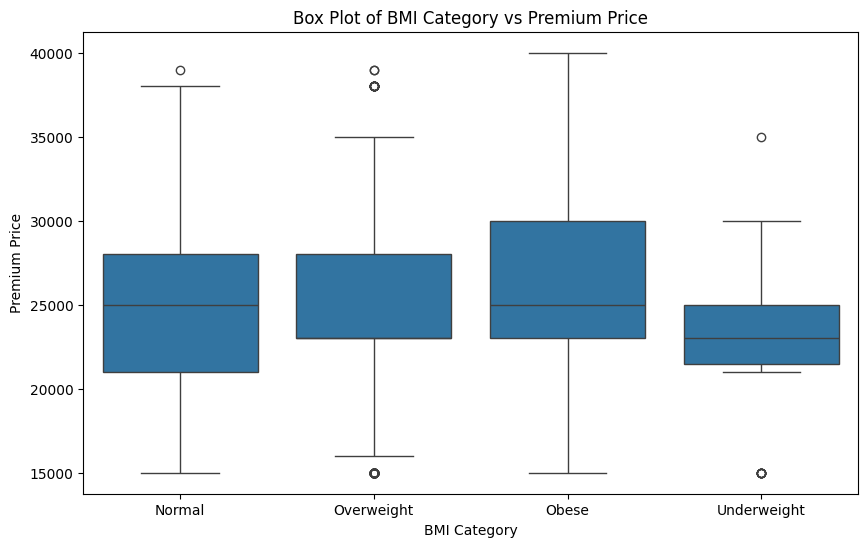

In [ ]:
# Box plot of BMI Category vs Premium Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMICategory', y='PremiumPrice', data=df)
plt.title('Box Plot of BMI Category vs Premium Price')
plt.xlabel('BMI Category')
plt.ylabel('Premium Price')
plt.show()

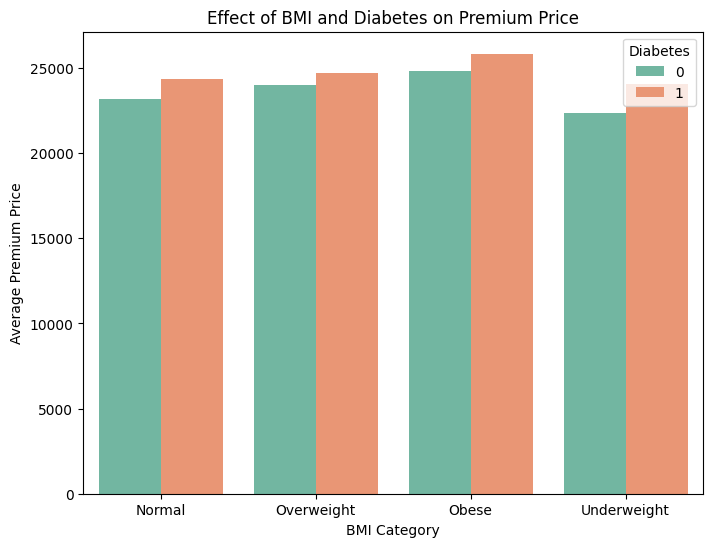

In [ ]:
# Visualize the effect of BMI and Diabetes on PremiumPrice
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='BMICategory', y='PremiumPrice', hue='Diabetes', errorbar=None, palette='Set2')

plt.title('Effect of BMI and Diabetes on Premium Price')
plt.xlabel('BMI Category')
plt.ylabel('Average Premium Price')
plt.legend(title='Diabetes')
plt.show()


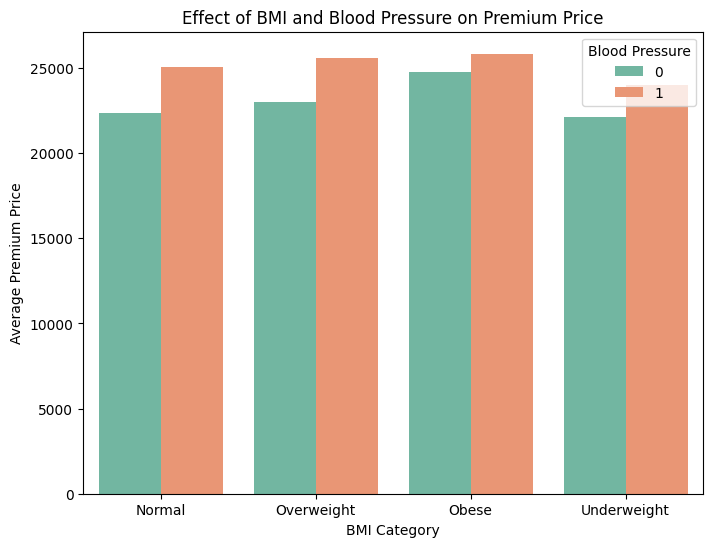

In [ ]:
# Visualize the effect of BMI and Blood Pressure on PremiumPrice
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='BMICategory', y='PremiumPrice', hue='BloodPressureProblems', errorbar=None, palette='Set2')

plt.title('Effect of BMI and Blood Pressure on Premium Price')
plt.xlabel('BMI Category')
plt.ylabel('Average Premium Price')
plt.legend(title='Blood Pressure')
plt.show()

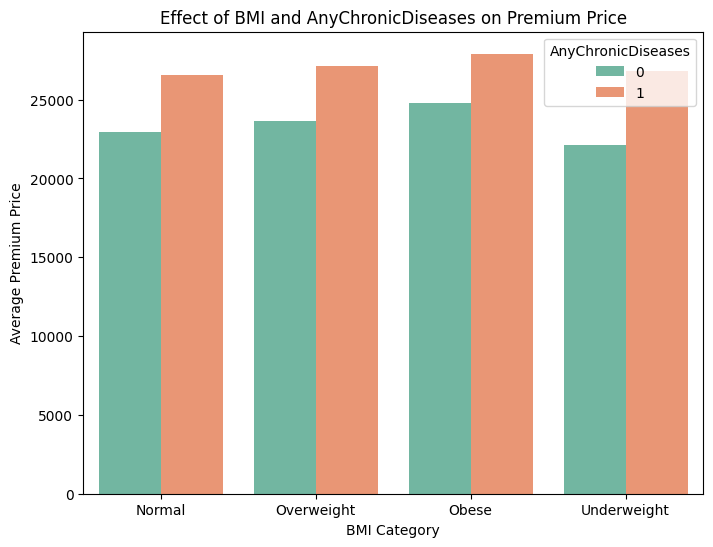

In [ ]:
# Visualize the effect of BMI and AnyChronicDiseases on PremiumPrice
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='BMICategory', y='PremiumPrice', hue='AnyChronicDiseases', errorbar=None, palette='Set2')

plt.title('Effect of BMI and AnyChronicDiseases on Premium Price')
plt.xlabel('BMI Category')
plt.ylabel('Average Premium Price')
plt.legend(title='AnyChronicDiseases')
plt.show()

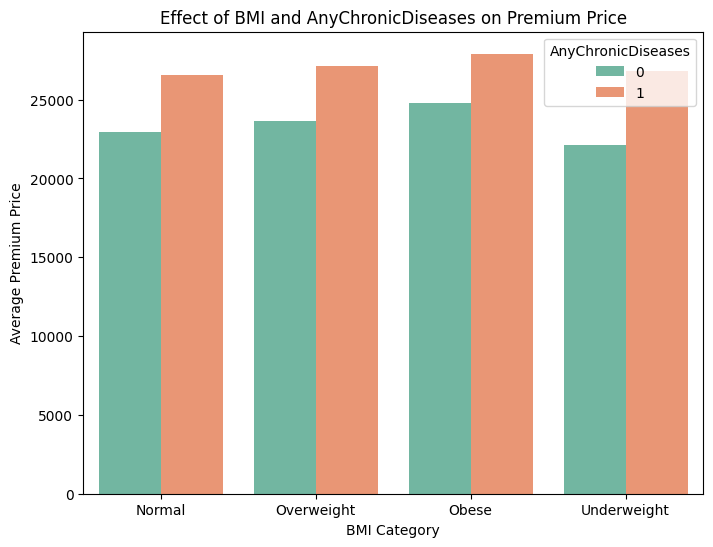

In [ ]:
# Visualize the effect of BMI and AnyChronicDiseases on PremiumPrice
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='BMICategory', y='PremiumPrice', hue='AnyChronicDiseases', errorbar=None, palette='Set2')

plt.title('Effect of BMI and AnyChronicDiseases on Premium Price')
plt.xlabel('BMI Category')
plt.ylabel('Average Premium Price')
plt.legend(title='AnyChronicDiseases')
plt.show()

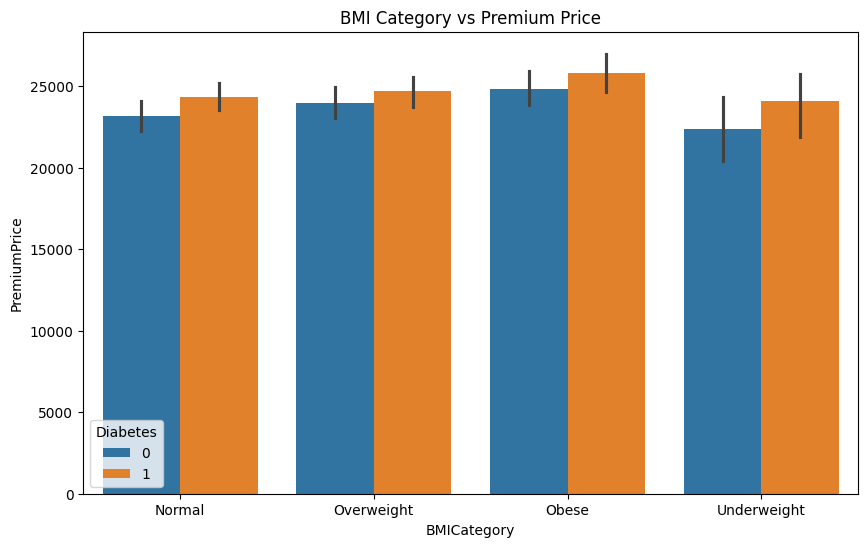

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='BMICategory', y='PremiumPrice', hue='Diabetes', data=df)
plt.title('BMI Category vs Premium Price')
plt.show()

In [ ]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'BMI', 'BMICategory'],
      dtype='object')

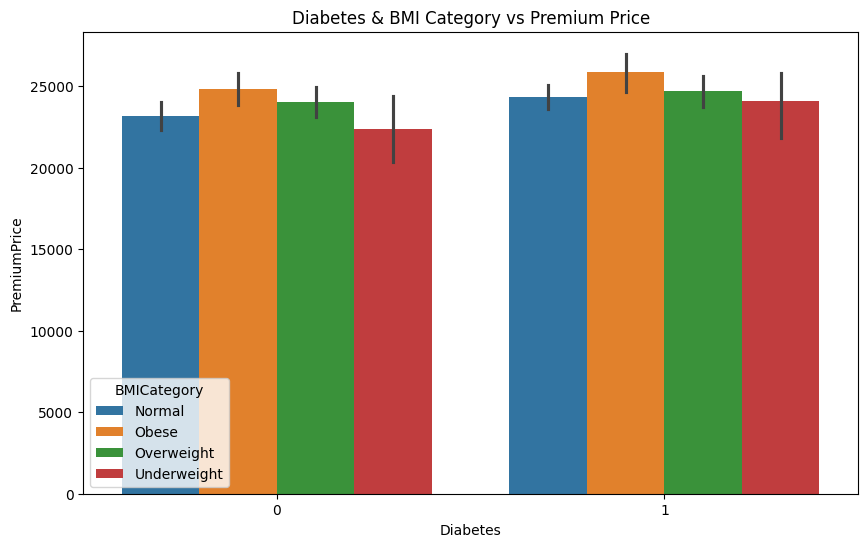

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Diabetes', y='PremiumPrice', hue='BMICategory', data=df)
plt.title('Diabetes & BMI Category vs Premium Price')
plt.show()

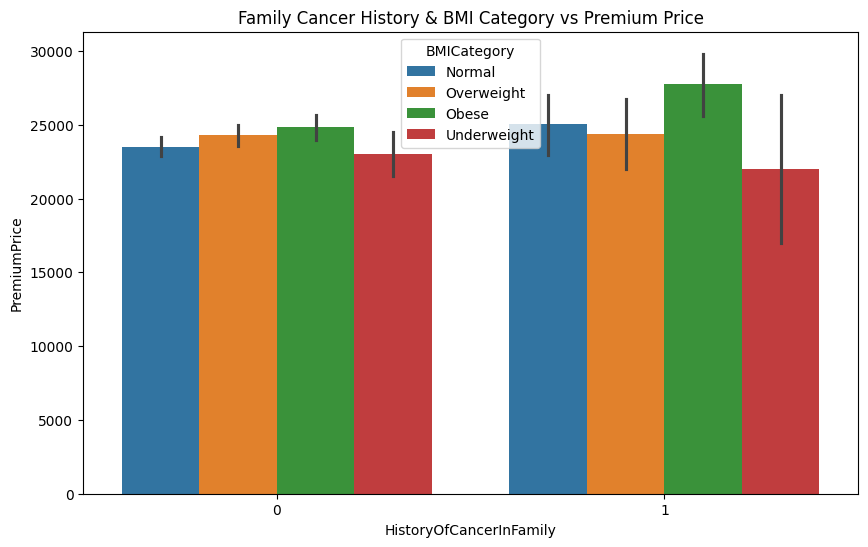

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='HistoryOfCancerInFamily', y='PremiumPrice', hue='BMICategory', data=df)
plt.title('Family Cancer History & BMI Category vs Premium Price')
plt.show()

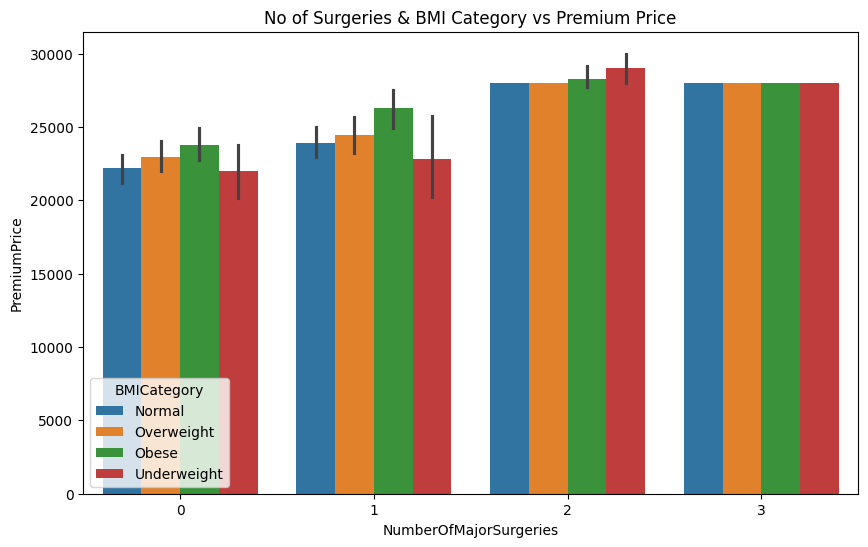

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfMajorSurgeries', y='PremiumPrice', hue='BMICategory', data=df)
plt.title('No of Surgeries & BMI Category vs Premium Price')
plt.show()

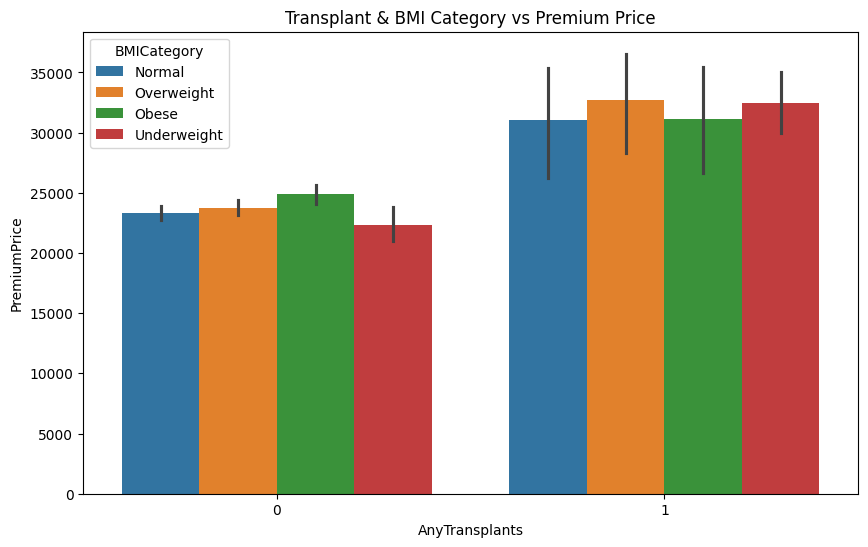

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AnyTransplants', y='PremiumPrice', hue='BMICategory', data=df)
plt.title('Transplant & BMI Category vs Premium Price')
plt.show()

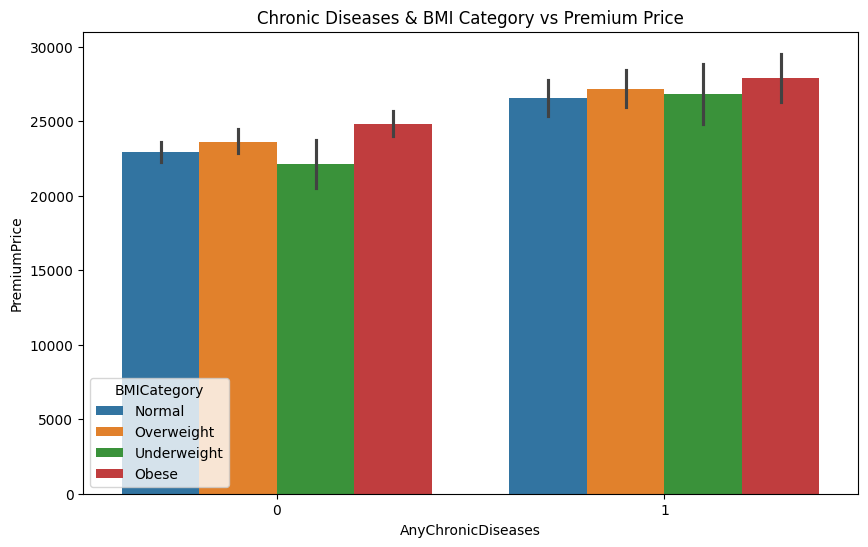

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AnyChronicDiseases', y='PremiumPrice', hue='BMICategory', data=df)
plt.title('Chronic Diseases & BMI Category vs Premium Price')
plt.show()

## **Hypothesis Testing**

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
alpha =0.05
print('\n')
#T-test for PremiumPrice between those with and without chronic diseases
print("Null Hypothesis (H0): There is no difference in mean premium price for individuals with chronic diseases and without chronic diseases.")
print("Alternative Hypothesis (H1): There is significant difference between the mean premium prices for individuals with chronic diseases and without chronic diseases.")
t_stat, p_val = ttest_ind(df[df['AnyChronicDiseases'] == 1]['PremiumPrice'],
                          df[df['AnyChronicDiseases'] == 0]['PremiumPrice'])
print('\n')
print(f'T-test: t-statistic = {t_stat}, p-value = {p_val}')
print('\n')
print("Conclusion : ")
if p_val < alpha:
  print("Reject H0, therefore There is significant difference between the mean premium prices for individuals with chronic diseases and without chronic diseases.")
else:
  print("Fail to Reject H0, therefore There is no difference in mean premium price for individuals with chronic diseases and without chronic diseases.")



Null Hypothesis (H0): There is no difference in mean premium price for individuals with chronic diseases and without chronic diseases.
Alternative Hypothesis (H1): There is significant difference between the mean premium prices for individuals with chronic diseases and without chronic diseases.


T-test: t-statistic = 6.69104572734849, p-value = 3.713413765291482e-11


Conclusion : 
Reject H0, therefore There is significant difference between the mean premium prices for individuals with chronic diseases and without chronic diseases.


In [ ]:
# ANOVA for PremiumPrice based on NumberOfMajorSurgeries
# Hypothesis formulation
print("Null Hypothesis (H0): The mean premium price is the same for all groups irrespective of the number of major surgeries done.")
print("Alternative Hypothesis (H1): At least mean premium price for one of the groups is different from the others.")
print('\n')
anova_stat, anova_p_val = f_oneway(df[df['NumberOfMajorSurgeries'] == 0]['PremiumPrice'],
                                   df[df['NumberOfMajorSurgeries'] == 1]['PremiumPrice'],
                                   df[df['NumberOfMajorSurgeries'] == 2]['PremiumPrice'],
                                   df[df['NumberOfMajorSurgeries'] == 3]['PremiumPrice'])
print(f'ANOVA: F-statistic = {anova_stat}, p-value = {anova_p_val}')
print('\n')
print('Conclusion:')
if anova_p_val < alpha:
  print("Reject H0, Therefore at least mean premium price for one of the groups is different from the others.")
else:
  print("Fail to Reject H0, therefore The mean premium price is the same for all groups irrespective of the number of major surgeries done.")

Null Hypothesis (H0): The mean premium price is the same for all groups irrespective of the number of major surgeries done.
Alternative Hypothesis (H1): At least mean premium price for one of the groups is different from the others.


ANOVA: F-statistic = 26.13539359740762, p-value = 2.8711631377228097e-16


Conclusion:
Reject H0, Therefore at least mean premium price for one of the groups is different from the others.


In [ ]:
# Chi-square test for association between AnyChronicDiseases and HistoryOfCancerInFamily
# Hypothesis formulation
print("Null Hypothesis (H0): There is no association between the presence of chronic diseases and a history of cancer in the family.")
print("Alternative Hypothesis (H1): There is an association between the presence of chronic diseases and a history of cancer in the family.")
contingency_table = pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])
print('contigency_table:', contingency_table)
chi2_stat, chi2_p_val, dof, ex = chi2_contingency(contingency_table)
print('\n')
print(f'Chi-square test: chi2_statistic = {chi2_stat}, p-value = {chi2_p_val}')
print('\n')
print('Conclusion:')
if chi2_p_val < alpha:
    print("Reject the null hypothesis: There is an association between the presence of chronic diseases and a history of cancer in the family")
else:
    print("Fail to reject the null hypothesis: There is no association between the presence of chronic diseases and a history of cancer in the family.")

Null Hypothesis (H0): There is no association between the presence of chronic diseases and a history of cancer in the family.
Alternative Hypothesis (H1): There is an association between the presence of chronic diseases and a history of cancer in the family.
contigency_table: HistoryOfCancerInFamily    0   1
AnyChronicDiseases              
0                        714  94
1                        156  22


Chi-square test: chi2_statistic = 0.02062393388215223, p-value = 0.8858081638149811


Conclusion:
Fail to reject the null hypothesis: There is no association between the presence of chronic diseases and a history of cancer in the family.


In [ ]:
from scipy.stats import norm, binom, kstest, shapiro, levene
# The three assumptions are that the data follows normal distribution,
# the data is independant and there is equal variances among the diffrent groups.
alpha =0.05
# Shapiro-Wilk test for normality
groups = df['BMICategory'].unique()
for group in groups:
    stat, p = shapiro(df[df['BMICategory'] == group]['PremiumPrice'])
    print(f'Group {group}: Statistics={stat}, p={p}')
if p < alpha:
  print('There is no normality')
else:
  print('Shapiro-Wilk Test: p-value > 0.05 suggests normality.')

print('\n')
# Test for checking normality
print("Ho: The data follow normal distribution.")
print("Ha: The data doesn't follow normal distribution.")
# The three tests to check whether the distribution is normal are QQPlot, kstest, shapiro test.

alpha =0.05
print('\n')
test_statistic, pvalue = kstest(df[df['BMICategory'] == group]['PremiumPrice'], norm.cdf)
print("Test_statistic : ", test_statistic)
print("pvalue : ", pvalue)
print('\n')
if pvalue < alpha:
  print("Reject Ho, therefore the data doesn't follow normal distribution.")
else:
  print("Fail to Reject Ho, therefore the data follow normal distribution. \nConclusion: T-Test will give correct result.")

# Levene's test for homogeneity of variances
stat, p = levene(
    df[df['BMICategory'] == 'Normal']['PremiumPrice'],
    df[df['BMICategory'] == 'Underweight']['PremiumPrice'],
    df[df['BMICategory'] == 'Overweight']['PremiumPrice'],
    df[df['BMICategory'] == 'Obese']['PremiumPrice']
)
print('\n')
print(f'Levene’s test: Statistics={stat}, p={p}')
print('\n')
if p < alpha:
  print('There is no homogeneity of variances')
else:
  print('Levene’s Test: p-value > 0.05 suggests homogeneity of variances.')

Group Normal: Statistics=0.9176448927695167, p=2.9848830864995576e-12
Group Overweight: Statistics=0.9177086861514476, p=2.44674330255444e-12
Group Obese: Statistics=0.9230944495302398, p=2.1157688418384678e-11
Group Underweight: Statistics=0.8826322080695032, p=0.0008541182251230586
There is no normality


Ho: The data follow normal distribution.
Ha: The data doesn't follow normal distribution.


Test_statistic :  1.0
pvalue :  0.0


Reject Ho, therefore the data doesn't follow normal distribution.


Levene’s test: Statistics=9.431518569939985, p=3.795778904833233e-06


There is no homogeneity of variances


In [ ]:
from scipy.stats import f, f_oneway, kruskal
# Kruskal Test
print("Null Hypothesis H0: The mean Premium Price is the same across all categories of BMI.")
print("Alternate Hypothesis: At least one mean Premium Price differs significantly from the others across BMI categories.")
print("\n")
alpha = 0.05
statistic, pvalue = kruskal(df[df['BMICategory'] == 'Normal']['PremiumPrice'],
    df[df['BMICategory'] == 'Underweight']['PremiumPrice'],
    df[df['BMICategory'] == 'Overweight']['PremiumPrice'],
    df[df['BMICategory'] == 'Obese']['PremiumPrice'])
print("statistic : ", statistic)
print("pvalue : ", pvalue)

print("Conclusion : ")
if pvalue < alpha:
  print("Reject Ho, therefore At least one mean Premium Price differs significantly from the others across BMI categories.")
else:
  print("Fail to Reject Ho, therefore The mean Premium Price is the same across all categories of BMI.")

Null Hypothesis H0: The mean Premium Price is the same across all categories of BMI.
Alternate Hypothesis: At least one mean Premium Price differs significantly from the others across BMI categories.


statistic :  10.792530711278031
pvalue :  0.012902305576463914
Conclusion : 
Reject Ho, therefore At least one mean Premium Price differs significantly from the others across BMI categories.


In [ ]:
#F/ANOVA Test
print("Null Hypothesis H0: The mean Premium Price is the same across all categories of BMI.")
print("Alternate Hypothesis: At least one mean Premium Price differs significantly from the others across BMI categories.")
print("\n")
alpha = 0.05
F_statistic, F_pvalue = f_oneway(df[df['BMICategory'] == 'Normal']['PremiumPrice'],
    df[df['BMICategory'] == 'Underweight']['PremiumPrice'],
    df[df['BMICategory'] == 'Overweight']['PremiumPrice'],
    df[df['BMICategory'] == 'Obese']['PremiumPrice'])
print("F_statistic : ", F_statistic)
print("F_pvalue : ", F_pvalue)

print("Conclusion : ")
if F_pvalue < alpha:
  print("Reject Ho, therefore At least one mean Premium Price differs significantly from the others across BMI categories.")
else:
  print("Fail to Reject Ho, therefore The mean Premium Price is the same across all categories of BMI.")

Null Hypothesis H0: The mean Premium Price is the same across all categories of BMI.
Alternate Hypothesis: At least one mean Premium Price differs significantly from the others across BMI categories.


F_statistic :  4.036339555348732
F_pvalue :  0.007243728544715755
Conclusion : 
Reject Ho, therefore At least one mean Premium Price differs significantly from the others across BMI categories.


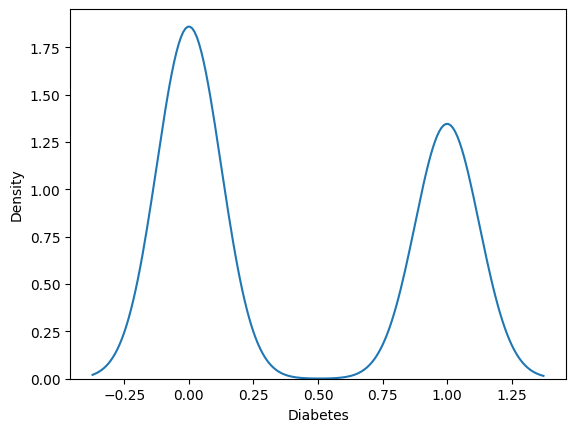

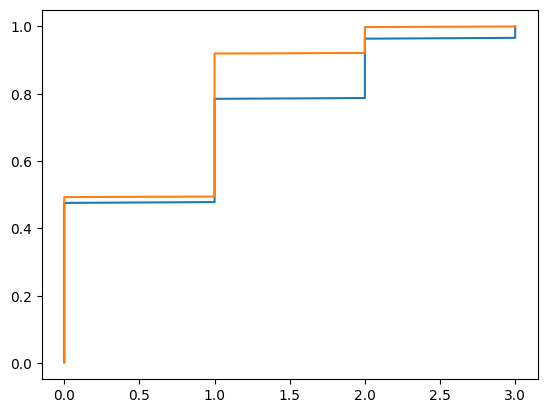

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
# checking for these assumptions
sns.kdeplot(df['Diabetes'])
plt.show()

Diabetes_yes = df[df['Diabetes']==1]
Diabetes_no = df[df['Diabetes']==0]

e1 = ECDF(Diabetes_yes['NumberOfMajorSurgeries'])
e2 = ECDF(Diabetes_no['NumberOfMajorSurgeries'])

plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)
plt.show()

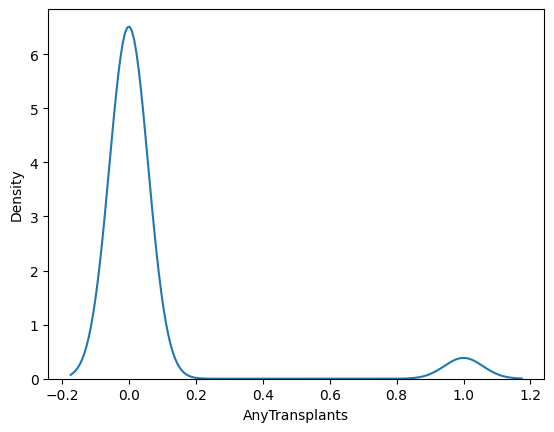

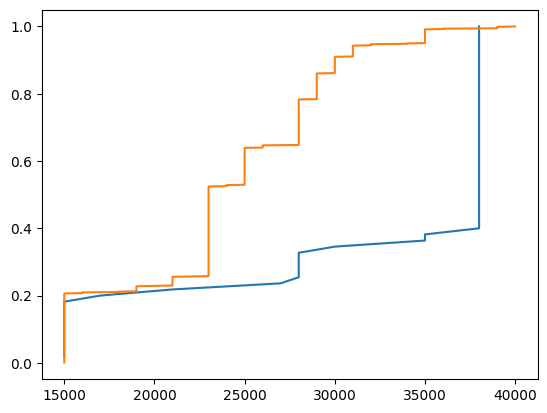

In [ ]:
# checking for these assumptions
sns.kdeplot(df['AnyTransplants'])
plt.show()

e1 = ECDF(df[df['AnyTransplants']==1]['PremiumPrice'])
e2 = ECDF(df[df['AnyTransplants']==0]['PremiumPrice'])

plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)
plt.show()

# **Regression Analysis**

In [ ]:
# Regression Analysis
import statsmodels.api as sm

# Linear regression to predict PremiumPrice
X = df[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
        'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
y = df['PremiumPrice']
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.92e-210
Time:                        18:28:16   Log-Likelihood:                -9508.6
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     975   BIC:                         1.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

In [ ]:
import statsmodels.api as sm

# Create dummy variables for BMI Category
df['BMI_Category_Normal'] = df['BMICategory'].apply(lambda x: 1 if x == 'Normal' else 0)
df['BMI_Category_Overweight'] = df['BMICategory'].apply(lambda x: 1 if x == 'Overweight' else 0)
df['BMI_Category_Obese'] = df['BMICategory'].apply(lambda x: 1 if x == 'Obese' else 0)
df['BMI_Category_Underweight'] = df['BMICategory'].apply(lambda x: 1 if x == 'Underweight' else 0)

# Define predictors (Age, BMI Categories)
X = df[['Age', 'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Category_Obese', 'BMI_Category_Underweight']]
y = df['PremiumPrice']

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     251.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          7.52e-149
Time:                        18:28:17   Log-Likelihood:                -9667.9
No. Observations:                 986   AIC:                         1.935e+04
Df Residuals:                     981   BIC:                         1.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
X = df[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
        'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
y = df['PremiumPrice']

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     175.5
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          3.92e-210
Time:                        18:28:17   Log-Likelihood:                -9508.6
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     975   BIC:                         1.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

# **Checking assumptions of Linear Regression**

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install --upgrade numpy scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
accelerate 0.32.1 requires numpy<2.0.0,>=1.17, but you have numpy 2.1.0 which 

In [ ]:
#Linearity:
#Independence of Errors: The errors (residuals) should be independent of each other.
#Homoscedasticity (Constant Variance of Errors):
#Normality of Errors: The errors should be normally distributed.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats


# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Compute residuals
residuals = y - y_pred

# Create a figure with subplots using Seaborn
plt.figure(figsize=(10, 8))
plt.suptitle('Verifying Assumptions', fontsize=16)

# Subplot 1: Residuals vs. Predicted Values (Homoscedasticity)
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred, y=residuals, color='grey', alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Subplot 2: Scatterplot of Residuals
plt.subplot(2, 2, 2)
sns.scatterplot(x=range(len(residuals)), y=residuals, color='black', alpha=0.8)
plt.title('Scatterplot of Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')

# Subplot 3: Histogram of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True, color='r')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Subplot 4: Q-Q Plot of Residuals (using statsmodels or scipy.stats)
plt.subplot(2, 2, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust top space for the title
plt.show()


ImportError: cannot import name '_average' from 'sklearn.utils._array_api' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py)

In [ ]:
# Residuals are uniformly distributed around the 0
# Residuals are almost normaly distributed
# QQ plot is gives a straight line with slight deviations at start and end

Model Builing

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Example data (replace with your actual data)
X = df[['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
        'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
y = df['PremiumPrice']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization of data
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

print('\n')
# Make predictions
y_pred = model.predict(X_train_scaled)

# Evaluation metrics
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2):", r2_train)

print('\n')
y_pred_test= model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse_test)
print('\n')
# Calculate R-squared score for test data
r2_test = r2_score(y_test, y_pred_test)
print("Test R-squared (R2) score:", r2_test)

# Saving the model and scaler object
import pickle
with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)

In [ ]:
X_train

In [ ]:
X_train_scaled

In [ ]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=.01)

# Fit the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluation metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Mean Squared Error (MSE):", mse_ridge)
print("Ridge Regression R-squared (R2) score:", r2_ridge)
print("Ridge Regression Coefficients:", ridge_model.coef_)

In [ ]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluation metrics for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Mean Squared Error (MSE):", mse_lasso)
print("Lasso Regression R-squared (R2) score:", r2_lasso)
print("Lasso Regression Coefficients:", lasso_model.coef_)


In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize Elastic Net model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Fit the model
elastic_net_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_elastic_net = elastic_net_model.predict(X_test_scaled)

# Evaluation metrics for Elastic Net Regression
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print("Elastic Net Regression Mean Squared Error (MSE):", mse_elastic_net)
print("Elastic Net Regression R-squared (R2) score:", r2_elastic_net)
print("Elastic Net Regression Coefficients:", elastic_net_model.coef_)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluation metrics for Decision Tree Regressor
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor Mean Squared Error (MSE):", mse_tree)
print("Decision Tree Regressor R-squared (R2) score:", r2_tree)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation metrics for XGBoost Regressor
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Mean Squared Error (MSE):", mse_xgb)
print("XGBoost Regression R-squared (R2) score:", r2_xgb)

In [ ]:
df.head()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split


# Define feature and target variables
feature_columns = [
    'Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
    'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'
]
target_column= 'PremiumPrice'

X = df[feature_columns]
y = df[target_column]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature columns
numerical_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']
categorical_features = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily'
]

# Define transformers for each type of feature
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define and train model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
rf_model.fit(X_train, y_train)

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('R^2:', r2_score(y_test, y_pred))

print('Random Forest Performance:')
evaluate_model(rf_model, X_test, y_test)

# Hyperparameter tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_features': ['sqrt', 'log2', None],
    'regressor__max_depth': [5, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=1,  # Set to 1 to disable parallel processing
    scoring='neg_mean_squared_error',
    error_score='raise'
)

# Fit GridSearchCV
try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f"An error occurred during GridSearchCV: {e}")

# Display best parameters and performance of tuned model
print('Best Parameters:', grid_search.best_params_)

grid_search.best_estimator_

print('Tuned Random Forest Performance:')
evaluate_model(grid_search.best_estimator_, X_test, y_test)

#Saving model
import pickle
with open('grid_search.best_estimator_.pkl', 'wb') as file:
  pickle.dump(grid_search.best_estimator_, file)

In [ ]:
df.head()

In [ ]:
import warnings
import numpy as np
import pandas as pd
import pickle


warnings.filterwarnings('ignore')
# Load the trained model
with open('grid_search.best_estimator_.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
  loaded_scaler = pickle.load(file)

# Define the feature values for prediction
input_data = {
    'Age': [18],
    'Diabetes': [0],
    'BloodPressureProblems': [0],
    'AnyTransplants': [0],
    'AnyChronicDiseases': [0],
    'Height': [145],
    'Weight': [51],
    'KnownAllergies': [0],
    'HistoryOfCancerInFamily': [0],
    'NumberOfMajorSurgeries': [0]
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Predict the premium price
predicted_premium = loaded_model.predict(input_df)

print('Predicted Premium Price:', predicted_premium[0])

In [ ]:
import warnings
import numpy as np
import pandas as pd
import pickle


warnings.filterwarnings('ignore')
# Load the trained model
with open('grid_search.best_estimator_.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
  loaded_scaler = pickle.load(file)

# Define the feature values for prediction
input_data = {
    'Age': [18],
    'Diabetes': [0],
    'BloodPressureProblems': [0],
    'AnyTransplants': [0],
    'AnyChronicDiseases': [0],
    'Height': [145],
    'Weight': [51],
    'KnownAllergies': [0],
    'HistoryOfCancerInFamily': [0],
    'NumberOfMajorSurgeries': [0]
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Predict the premium price
predicted_premium = loaded_model.predict(input_df)

print('Predicted Premium Price:', predicted_premium)

In [ ]:
import warnings
import numpy as np
import pandas as pd
import pickle


warnings.filterwarnings('ignore')
# Load the trained model
with open('grid_search.best_estimator_.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
  loaded_scaler = pickle.load(file)

# Define the feature values for prediction
input_data = {
    'Age': [65],
    'Diabetes': [1],
    'BloodPressureProblems': [1],
    'AnyTransplants': [1],
    'AnyChronicDiseases': [1],
    'Height': [150],
    'Weight': [132],
    'KnownAllergies': [1],
    'HistoryOfCancerInFamily': [1],
    'NumberOfMajorSurgeries': [2]
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Predict the premium price
predicted_premium = loaded_model.predict(input_df)

print('Predicted Premium Price:', predicted_premium)

In [ ]:
import warnings
import numpy as np
import pandas as pd
import pickle


warnings.filterwarnings('ignore')
# Load the trained model
with open('model.pkl', 'rb') as file:
  loaded_model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
  loaded_scaler = pickle.load(file)

# Define the feature values for prediction
input_data = {
    'Age': [65],
    'Diabetes': [1],
    'BloodPressureProblems': [1],
    'AnyTransplants': [1],
    'AnyChronicDiseases': [1],
    'Height': [150],
    'Weight': [132],
    'KnownAllergies': [1],
    'HistoryOfCancerInFamily': [1],
    'NumberOfMajorSurgeries': [2]
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)
scaled_df = loaded_scaler.transform(input_df)
# Predict the premium price
predicted_premium = loaded_model.predict(scaled_df)

print('Predicted Premium Price:', predicted_premium)